# Advertising and Sales

https://www.kaggle.com/sazid28/advertising.csv/downloads/advertising.csv.zip/1

TV -- amount spend on TV ads on sales in dollars.

radio -- amount spend on radio ads on sales in dollars.

newspaper -- amount spend on newspaper ads on sales in dollars.

sales --- sale in dollars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [13]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
data.reset_index(inplace=True, drop=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
data.shape

(200, 4)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='newspaper', ylabel='sales'>

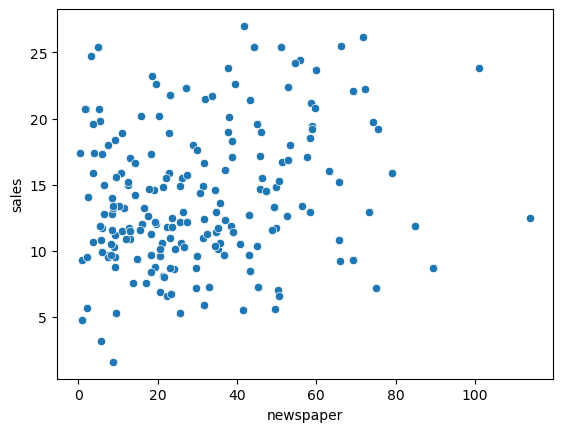

In [18]:
sns.scatterplot(data = data, x = 'newspaper', y = 'sales')

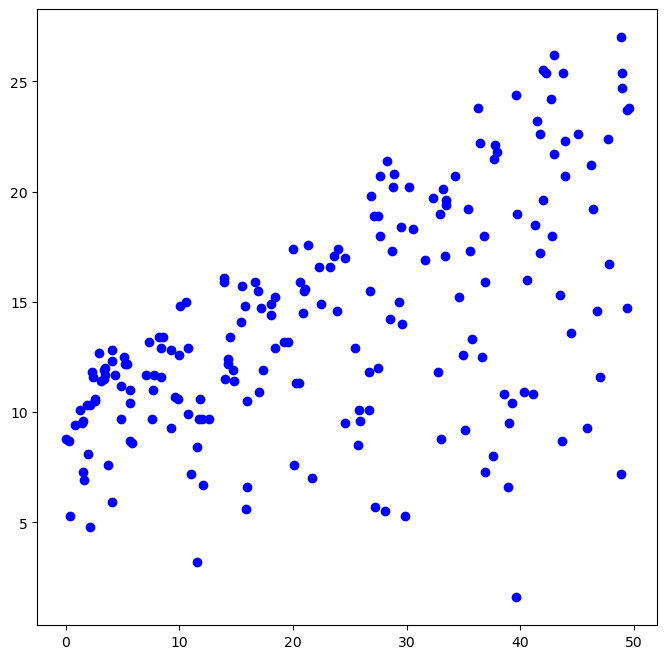

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(data['radio'], data['sales'], c = 'b')
plt.show()

<Axes: xlabel='TV', ylabel='sales'>

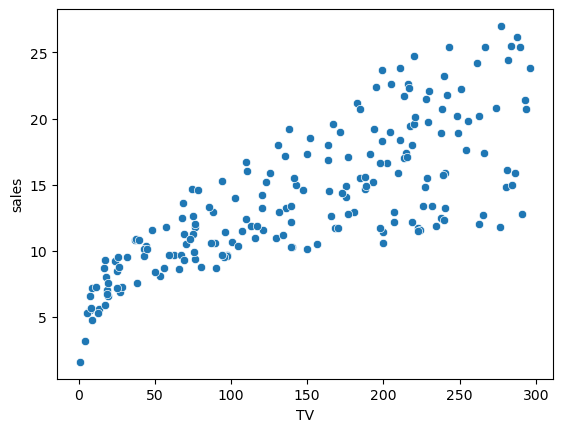

In [9]:
sns.scatterplot(data = data, x = 'TV', y = 'sales')

In [20]:
data_correlation = data.corr()
data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


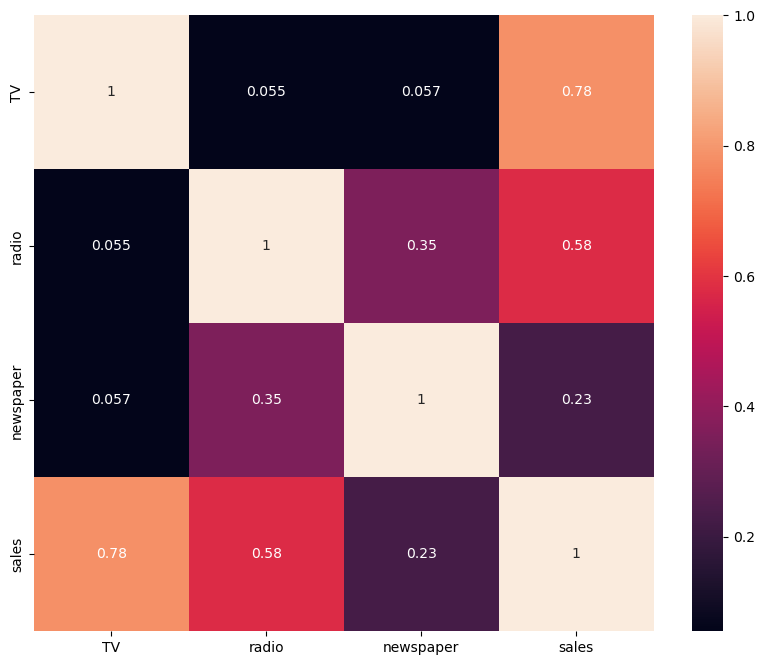

In [21]:
plt.subplots(figsize = (10, 8))
sns.heatmap(data_correlation, annot=True)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression\n")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

In [25]:
from sklearn.linear_model import Lasso

# alpha -> 0 --> lasso, normal linear regression olur yani hiç regularization yoktur.
# alpha küçük --> Hafif regularization vardır, bazı katsayılar azalır ama sıfıra gitmeyebilir.
# alpha büyük --> güçlü regularization vardır, daha fazla katsayı sıfıra çekilir, özellik seçimi yapılır.

def lasso_model(x_train, y_train):
    print("Lasso Regression\n")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

In [26]:
from sklearn.linear_model import Ridge

# L2 Regularization

def ridge_model(x_train, y_train):
    print("Ridge Regression\n")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

In [27]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    print("SGD Regression\n")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

In [29]:
from sklearn.neural_network import MLPRegressor

def mlp_model(x_train, y_train):
    print("MLP Regression\n")
    mlp_regression = MLPRegressor(activation='relu', hidden_layer_sizes={13, 13, 13}, solver = 'lbfgs', verbose = True, max_iter=20000) # 3 hidden layers, 13 nöron
    mlp_regression.fit(x_train, y_train)
    return mlp_regression

In [30]:
def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score: ", r_score)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10,8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("sales of advertising")
    plt.legend()
    plt.show()

    return {'model' : model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred'  : y_pred,  'sample' : df_y.sample(10)            
            }

Linear Regression

Training Score :  0.9032348536779796
Testing Score:  0.8573454431072063
     y_test     y_pred
39     21.5  20.507235
19     14.6  14.231429
37     14.7  15.753410
121     7.0   8.005962
137    20.8  20.954215
25     12.0  15.648032
6      11.8  11.828387
148    10.9  12.342412
186    10.3   9.782644
134    10.8  12.021902


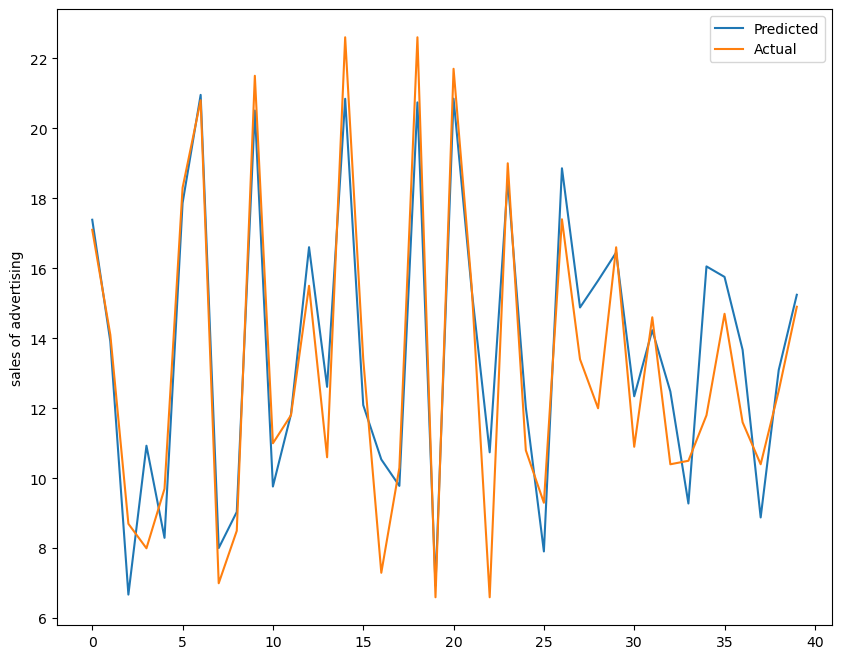

In [31]:
linear_regression = build_and_train_model(data, "sales", linear_model)

Lasso Regression

Training Score :  0.8500959005203526
Testing Score:  0.8635262863446764
     y_test     y_pred
89     16.7  16.040901
87     16.0  15.079045
70     18.3  16.949478
193    19.6  17.336491
64     18.0  16.133601
174    11.5  14.047945
140    10.9  10.445455
46     10.6  10.064001
24      9.7   9.429038
195     7.6   7.312483


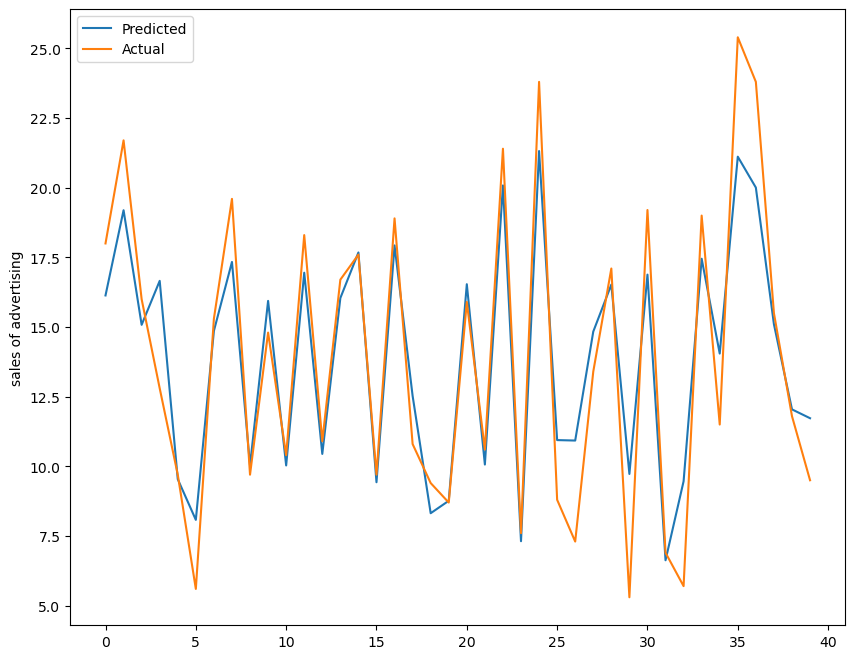

In [32]:
lasso_regression = build_and_train_model(data, "sales", lasso_model)

Ridge Regression

Training Score :  0.8859172448320002
Testing Score:  0.9280845983972861
     y_test     y_pred
160    14.4  14.247293
144    11.4  10.257536
198    25.5  23.528027
13      9.7   8.989975
100    11.7  14.033344
23     15.5  16.520932
171    14.5  14.410622
138     9.6   9.842168
168    17.1  17.180352
186    10.3   9.907184


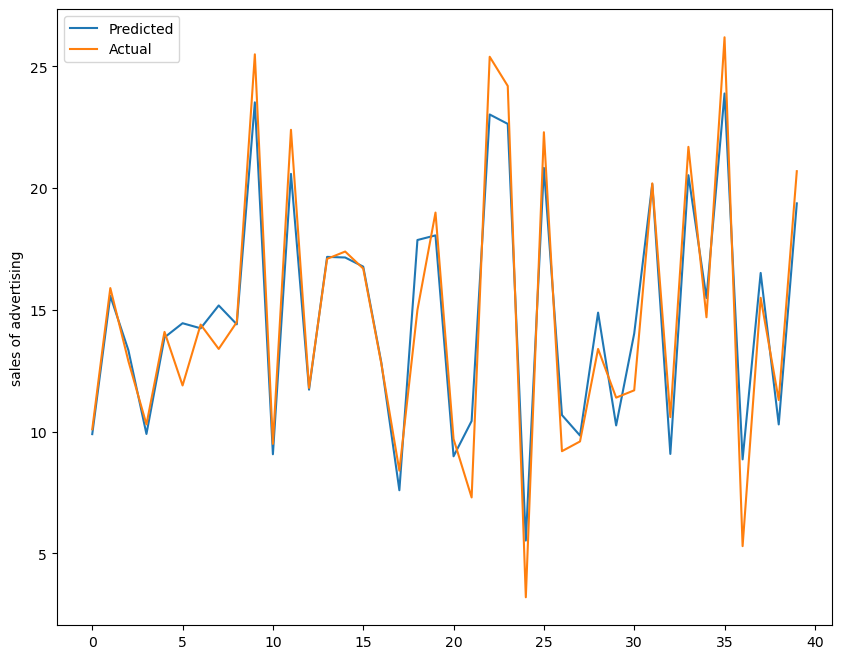

In [37]:
ridge_regression = build_and_train_model(data, "sales", ridge_model)

SGD Regression

Training Score :  0.8938720791673956
Testing Score:  0.9041038739274362
     y_test     y_pred
106     7.2   6.017953
157    10.1  10.064969
194    17.3  16.170450
94     11.5  10.340126
51     10.7   9.207155
160    14.4  14.150718
163    18.0  17.030705
134    10.8  11.612519
179    12.6  12.344118
144    11.4  10.032118


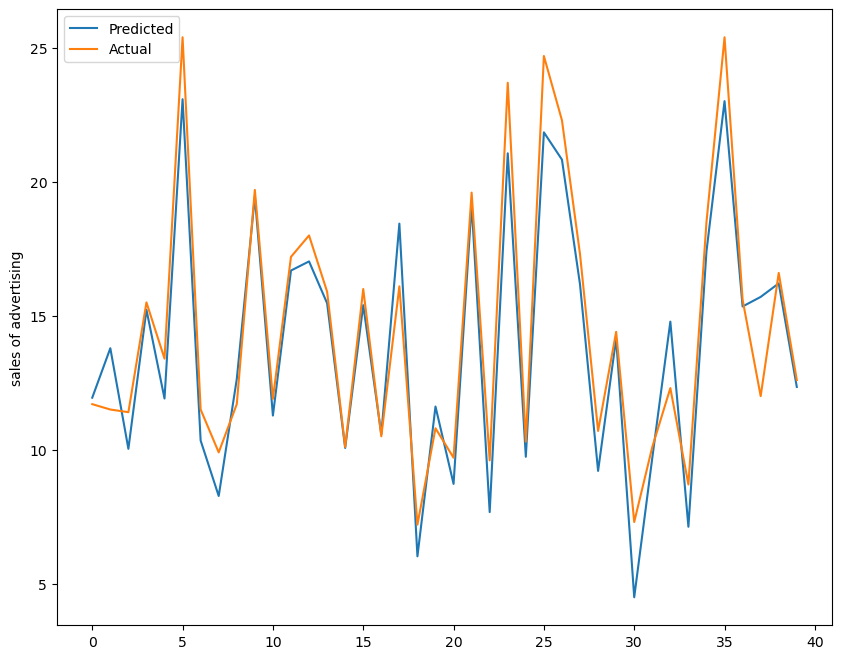

In [42]:
sgd_regression = build_and_train_model(data, "sales", sgd_model)

MLP Regression

Training Score :  0.9967130548058732
Testing Score:  0.9932536584642514
     y_test     y_pred
179    12.6  12.485086
126     6.6   6.028264
109    19.8  19.455343
152    16.6  16.359248
167    12.2  12.101678
107     8.7   8.907464
76      6.9   6.543570
183    26.2  25.810943
55     23.7  23.085479
18     11.3  11.093683


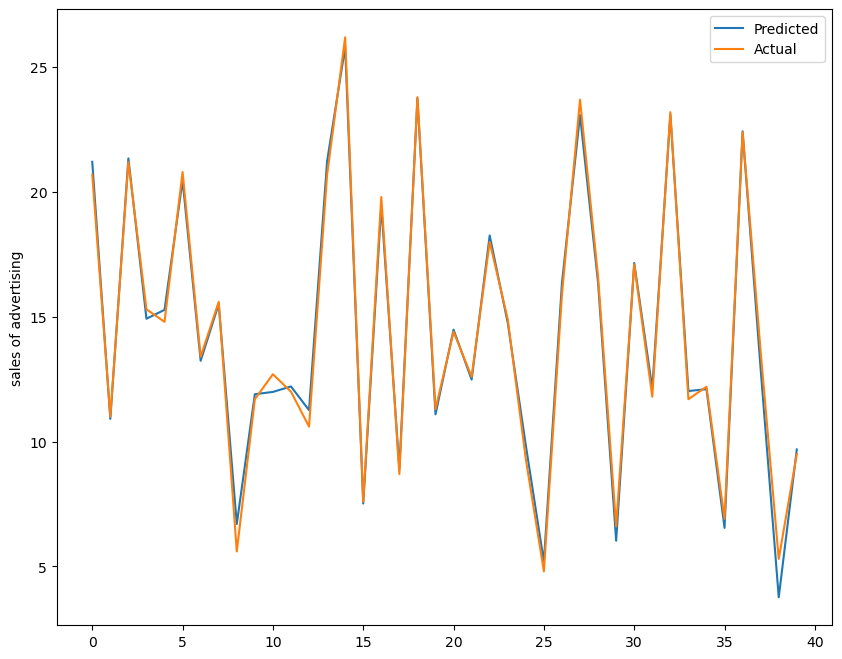

In [44]:
mlp_regression = build_and_train_model(data, "sales", mlp_model)